# The baseline model
## Structure

The model looks like this:
![hackathon_model.png](images/hackathon_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py
```

**How do I evaluate the model?**

```
python3 evaluation.py
```


In [1]:
import pandas
import matplotlib.pyplot as plt
import os
root = os.getcwd()

## Training

We trained for 50 epochs and selected the best model according to our validation loss:

In [2]:
training_df = pandas.read_csv(os.path.join(root, "output", "training.log"))
training_df

,epoch,acc,loss,val_acc,val_loss
0,1,0.804698,0.422906,0.833067,0.370159
1,2,0.847088,0.347206,0.847281,0.343429
2,3,0.861872,0.317836,0.861517,0.321344
3,4,0.869095,0.301930,0.868024,0.307488
4,5,0.874603,0.291477,0.868909,0.301456
5,6,0.877829,0.285541,0.874468,0.294131
6,7,0.880598,0.278538,0.877058,0.291035
7,8,0.883318,0.272191,0.875500,0.292941
8,9,0.884247,0.270131,0.880217,0.286123
9,10,0.886395,0.266557,0.876111,0.290351


### Training accuracy

<Figure size 432x288 with 0 Axes>

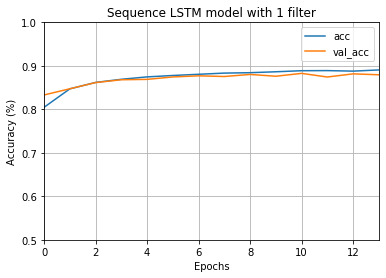

In [3]:
training_acc_columns = [x for x in list(training_df.columns) if "acc" in x]
plt.figure()
training_df[training_acc_columns].plot()
plt.grid(True)
plt.title("Sequence LSTM model with 1 filter")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

plt.ylim([0.5,1.0])

plt.show()

### Training loss

<Figure size 432x288 with 0 Axes>

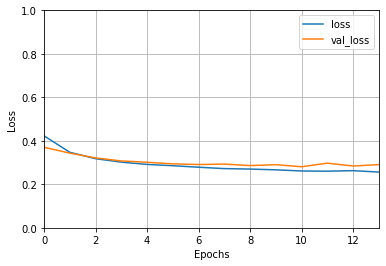

In [4]:
training_loss_columns = [x for x in list(training_df.columns) if "loss" in x]
plt.figure()
training_df[training_loss_columns].plot()
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.ylim([0.0,1.0])

plt.show()

## Evaluation

In [5]:
with open(os.path.join(root, "output", "eval.json")) as fp:
    df = pandas.read_json(fp).T

Each point in the boxplot is the accuracy for one subject

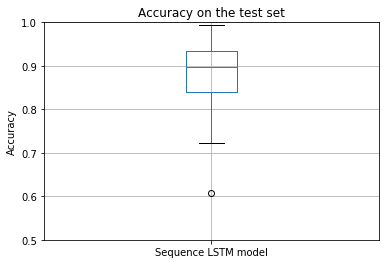

In [6]:
plt.figure()
df[["acc"]].boxplot()
plt.ylim([0.5,1])
plt.ylabel("Accuracy")
plt.title("Accuracy on the test set")
plt.xticks(plt.xticks()[0], ["Sequence LSTM model"])
plt.show()